In [2]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



import matplotlib.pyplot as plt
import seaborn as sns
!pip install koreanize-matplotlib

import koreanize_matplotlib

import os


import plotly.graph_objects as go

!pip install lifetimes



from scipy import stats

import plotly.express as px


Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 10.3 MB/s eta 0:00:00


In [4]:
ab_assignment = pd.read_csv('/content/ab_assignment.csv')
campaigns = pd.read_csv('/content/campaigns.csv')
chat_events = pd.read_csv('/content/chat_events.csv')
event_logs = pd.read_csv('/content/event_logs.csv')
payment_transactions = pd.read_csv('/content/payment_transactions.csv')
plan_history = pd.read_csv('/content/plan_history.csv')
push_events = pd.read_csv('/content/push_events.csv')
referral_events = pd.read_csv('/content/referral_event.csv')
users = pd.read_csv('/content/users.csv')

# referral_events 데이터 확인


In [5]:
referral_events.head()

,referrer_user_id,referred_user_id,referral_time,referral_code
0,usr_6b87a57bd775,usr_999627af31c9,2025-01-03 07:00:00,rf_2dc98f20
1,usr_065a57484a03,usr_97c482c5ea09,2024-12-04 19:23:00,rf_323a083c
2,usr_b783533a534b,usr_039406094001,2025-01-14 15:12:00,rf_9b6ed228
3,usr_999627af31c9,usr_baae86ef556b,2025-02-15 11:50:00,rf_50e5a02d
4,usr_2b0c7bbc467f,usr_2752111a2aa5,2024-12-22 02:32:00,rf_86fb7f63


In [6]:
referral_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267 entries, 0 to 2266
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   referrer_user_id  2267 non-null   object
 1   referred_user_id  2267 non-null   object
 2   referral_time     2267 non-null   object
 3   referral_code     2267 non-null   object
dtypes: object(4)
memory usage: 71.0+ KB


In [7]:
referral_events['referrer_user_id'].nunique()

2059

In [8]:
referral_events['referrer_user_id'].duplicated().sum()

np.int64(208)

In [9]:
referral_events['referred_user_id'].nunique()

2267

In [10]:
referral_events['referral_code'].nunique()

2267

In [11]:
# 추천 이벤트 캠페인을 특정 시기에 한건가
# referral_events.plot(kind=line, x='referral_time')

# 추천을 많이 한 순위
한명이 엄청 많이 데리고 왓는냐

In [12]:
referral_events['referrer_user_id'].value_counts(ascending=False).head(20)

,count
referrer_user_id,
usr_dc2a44c01788,3
usr_a8801949778c,3
usr_234330229884,3
usr_76e7a5bc8bae,3
usr_e9ed9d02c760,3
usr_160534f34d51,3
usr_ada81393c5aa,3
usr_b0a2666556d2,3
usr_33e6555eb133,3


# event_logs 데이터 확인


In [13]:
event_logs.head()

,user_id,session_id,event_name,event_timestamp,event_properties,device_type,location
0,usr_6b87a57bd775,sess_faa527dc04c1,signup_completed,2025-02-09 12:50:00,"{""signup_method"": ""apple""}",web,"Seoul, South Korea"
1,usr_b95ee57a273a,sess_607f4ece57d5,signup_completed,2024-12-09 20:57:00,"{""signup_method"": ""naver""}",android,"Seoul, South Korea"
2,usr_fc7ffc4130f7,sess_d246f1a38cfe,signup_completed,2025-01-07 02:18:00,"{""signup_method"": ""kakao""}",ios,"Seoul, South Korea"
3,usr_f0dbe9c02021,sess_ec16730476dd,signup_completed,2025-01-25 11:14:00,"{""signup_method"": ""apple""}",android,"Seoul, South Korea"
4,usr_6f08473e5134,sess_97c64df2ce98,signup_completed,2025-01-30 02:22:00,"{""signup_method"": ""kakao""}",android,"Seoul, South Korea"


In [14]:
event_logs['device_type'].value_counts()

,count
device_type,
ios,240111
web,239356
android,237898


In [15]:
event_logs['event_properties'].value_counts()

,count
event_properties,
"{""page_name"": ""home""}",96038
{},65155
"{""course_id"": ""L101""}",10199
"{""course_id"": ""L104""}",10187
"{""course_id"": ""L105""}",10173
...,...
"{""plan_name"": ""annual_pro"", ""amount"": 199.99, ""payment_id"": ""pay_1ef264da2d79""}",1
"{""push_id"": ""push_8cea6f9f""}",1
"{""push_id"": ""push_2fe8dc31""}",1


In [16]:
event_logs['event_properties'].nunique()

13789

In [17]:
event_logs['event_name'].value_counts()

,count
event_name,
lesson_played,281218
first_lesson_played,96156
page_viewed,96038
quiz_submitted,81923
course_searched,57228
first_quiz_submitted,56372
signup_completed,22545
pricing_page_viewed,8783
payment_completed,4962


In [18]:
referral_counts = referral_events['referrer_user_id'].value_counts()
referrer_more_than_once = referral_counts[referral_counts > 1]
print(f"2번 이상 추천한 referrer_user_id의 개수: {len(referrer_more_than_once)}")

2번 이상 추천한 referrer_user_id의 개수: 192


In [19]:
referrer_exactly_three = referral_counts[referral_counts == 3]
print(f"3번 추천한 referrer_user_id의 개수: {len(referrer_exactly_three)}")

3번 추천한 referrer_user_id의 개수: 16


# Task
Analyze the characteristics of users who have made multiple referrals using the "referral_events" and "users" datasets.

## Identify top referrers

### Subtask:
Find the users who have referred the most new users.


**Reasoning**:
Calculate the number of referrals per user and display the top 20 referrers.



In [20]:
# referrer_user_id별 추천 횟수 계산
referral_counts = referral_events['referrer_user_id'].value_counts()

# 추천을 가장 많이 한 상위 20명 확인
top_referrers = referral_counts.head(20)

# 결과 출력
print("추천을 가장 많이 한 상위 20명의 유저 ID와 추천 횟수:")
print(top_referrers)

추천을 가장 많이 한 상위 20명의 유저 ID와 추천 횟수:
referrer_user_id
usr_dc2a44c01788    3
usr_a8801949778c    3
usr_234330229884    3
usr_76e7a5bc8bae    3
usr_e9ed9d02c760    3
usr_160534f34d51    3
usr_ada81393c5aa    3
usr_b0a2666556d2    3
usr_33e6555eb133    3
usr_4718a7e8b3f9    3
usr_c4741909e4b4    3
usr_2be9698dc24a    3
usr_2db316c18e7b    3
usr_26c55c42cce6    3
usr_be290b825073    3
usr_4a3e6fac7830    3
usr_f10cf43db55a    2
usr_83c946341c6a    2
usr_0772f431d851    2
usr_f3474d23f197    2
Name: count, dtype: int64


## Merge user data

### Subtask:
Join the `referral_events` data with the `users` dataframe to get demographic and acquisition information for the top referrers.

**Reasoning**:
To understand the characteristics of the top referrers, we need to combine their referral data with their user profile information. Merging the `referral_events` dataframe with the `users` dataframe on `user_id` will provide a comprehensive view.

In [21]:
# referral_events와 users 데이터프레임을 user_id를 기준으로 병합
# top_referrers는 Series 형태이므로 데이터프레임으로 변환하여 병합에 사용
top_referrers_df = top_referrers.reset_index()
top_referrers_df.columns = ['user_id', 'referral_count']

# user_id를 기준으로 users 데이터프레임과 병합
top_referrers_with_info = pd.merge(top_referrers_df, users, on='user_id', how='left')

# 병합 결과의 처음 20행 출력
print("상위 추천 유저 정보 (처음 20행):")
display(top_referrers_with_info.head(20))

상위 추천 유저 정보 (처음 20행):


,user_id,referral_count,created_at,last_seen_at,email,acquisition_source,subscription_plan,plan_status,device_type,plan_start_date,plan_end_date,gender,age_group,age,campaign_id,utm_source,utm_campaign
0,usr_dc2a44c01788,3,2024-12-25 17:17:00,2025-06-25 23:11:00,hyeonjui@example.org,referral,none,none,android,NaN,NaN,M,60s,61,cmp_003,google,sem24
1,usr_a8801949778c,3,2024-12-27 14:00:00,2025-06-30 06:14:00,jangeungyeong@example.com,organic,annual_pro,active,ios,2024-12-30 14:00:00,NaN,F,40s,41,cmp_002,referral,ref_buddy
2,usr_234330229884,3,2025-02-25 03:51:00,2025-07-03 06:53:00,kjang@example.org,facebook_ads,monthly_basic,active,ios,2025-03-04 03:51:00,NaN,F,30s,33,cmp_002,referral,ref_buddy
3,usr_76e7a5bc8bae,3,2024-12-11 02:21:00,2025-07-14 09:56:00,lo@example.org,referral,monthly_pro,canceled,web,2024-12-14 02:21:00,2025-01-13 02:21:00,M,50s,50,cmp_002,referral,ref_buddy
4,usr_e9ed9d02c760,3,2025-04-28 11:41:17,2025-05-08 14:40:00,jieunyang@example.org,organic,none,none,android,NaN,NaN,M,60s,80,cmp_001,facebook,spring24
5,usr_160534f34d51,3,2025-05-04 10:39:34,2025-05-27 20:40:00,yeji38@example.org,google_cpc,none,none,ios,NaN,NaN,M,20s,26,cmp_003,google,sem24
6,usr_ada81393c5aa,3,2024-12-03 04:26:00,2025-07-16 20:26:00,gangeunji@example.net,facebook_ads,monthly_pro,active,android,2024-12-03 04:26:00,NaN,M,20s,25,cmp_003,google,sem24
7,usr_b0a2666556d2,3,2025-01-17 23:34:00,2025-07-10 08:50:00,seunghyeon83@example.com,direct,none,none,ios,NaN,NaN,M,60s,106,cmp_002,referral,ref_buddy
8,usr_33e6555eb133,3,2025-05-03 02:38:08,2025-07-15 11:12:00,hyeonjii@example.net,facebook_ads,annual_pro,active,android,2025-05-15,NaN,F,30s,39,cmp_003,google,sem24
9,usr_4718a7e8b3f9,3,2025-01-04 04:18:00,2025-07-14 21:55:00,jihunam@example.com,referral,monthly_basic,active,android,2025-01-06 04:18:00,NaN,M,20s,24,cmp_003,google,sem24


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='referral_time'>

Text(0.5, 1.0, '시간별 추천 수')

Text(0.5, 0, '날짜')

Text(0, 0.5, '추천 수')

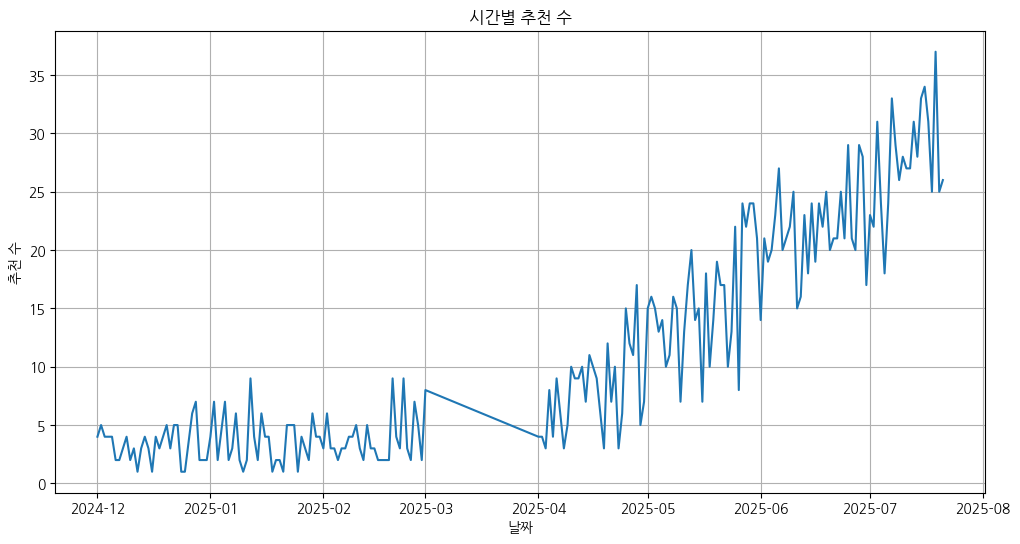

In [22]:
# 'referral_time' 열을 datetime 형식으로 변환
referral_events['referral_time'] = pd.to_datetime(referral_events['referral_time'])

# 시간별 추천 이벤트 수를 집계
referral_counts_over_time = referral_events.groupby(referral_events['referral_time'].dt.date).size()

# 선 그래프로 시각화
plt.figure(figsize=(12, 6))
referral_counts_over_time.plot(kind='line')
plt.title('시간별 추천 수')
plt.xlabel('날짜')
plt.ylabel('추천 수')
plt.grid(True)
plt.show()

In [23]:
referral_events['referral_time'].max()
referral_events['referral_time'].min()

Timestamp('2025-07-21 23:49:29')

Timestamp('2024-12-01 02:35:00')

#갯수확인

In [24]:
users.info()
users.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22545 entries, 0 to 22544
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             22545 non-null  object
 1   created_at          22545 non-null  object
 2   last_seen_at        22545 non-null  object
 3   email               22545 non-null  object
 4   acquisition_source  22545 non-null  object
 5   subscription_plan   22545 non-null  object
 6   plan_status         22545 non-null  object
 7   device_type         22545 non-null  object
 8   plan_start_date     7625 non-null   object
 9   plan_end_date       451 non-null    object
 10  gender              22545 non-null  object
 11  age_group           22545 non-null  object
 12  age                 22545 non-null  int64 
 13  campaign_id         22545 non-null  object
 14  utm_source          22545 non-null  object
 15  utm_campaign        22545 non-null  object
dtypes: int64(1), object(15

,0
user_id,22545
created_at,22482
last_seen_at,18997
email,13529
acquisition_source,5
subscription_plan,5
plan_status,4
device_type,3
plan_start_date,2057
plan_end_date,381


In [25]:
event_logs.info()
event_logs.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717365 entries, 0 to 717364
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           717365 non-null  object
 1   session_id        717365 non-null  object
 2   event_name        717365 non-null  object
 3   event_timestamp   717365 non-null  object
 4   event_properties  717365 non-null  object
 5   device_type       717365 non-null  object
 6   location          717365 non-null  object
dtypes: object(7)
memory usage: 38.3+ MB


,0
user_id,22545
session_id,128469
event_name,15
event_timestamp,632315
event_properties,13789
device_type,3
location,1


In [26]:
payment_transactions.info()
payment_transactions.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667 entries, 0 to 5666
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   payment_id  5667 non-null   object 
 1   user_id     5667 non-null   object 
 2   event_time  5667 non-null   object 
 3   plan_name   5667 non-null   object 
 4   amount      5667 non-null   float64
 5   method      5667 non-null   object 
 6   status      5667 non-null   object 
dtypes: float64(1), object(6)
memory usage: 310.0+ KB


,0
payment_id,5667
user_id,5667
event_time,112
plan_name,4
amount,4
method,6
status,1


In [27]:
event_logs

,user_id,session_id,event_name,event_timestamp,event_properties,device_type,location
0,usr_6b87a57bd775,sess_faa527dc04c1,signup_completed,2025-02-09 12:50:00,"{""signup_method"": ""apple""}",web,"Seoul, South Korea"
1,usr_b95ee57a273a,sess_607f4ece57d5,signup_completed,2024-12-09 20:57:00,"{""signup_method"": ""naver""}",android,"Seoul, South Korea"
2,usr_fc7ffc4130f7,sess_d246f1a38cfe,signup_completed,2025-01-07 02:18:00,"{""signup_method"": ""kakao""}",ios,"Seoul, South Korea"
3,usr_f0dbe9c02021,sess_ec16730476dd,signup_completed,2025-01-25 11:14:00,"{""signup_method"": ""apple""}",android,"Seoul, South Korea"
4,usr_6f08473e5134,sess_97c64df2ce98,signup_completed,2025-01-30 02:22:00,"{""signup_method"": ""kakao""}",android,"Seoul, South Korea"
...,...,...,...,...,...,...,...
717360,usr_ef208d9c8f03,sess_f6a006465844,page_viewed,2025-07-21 06:03:36,"{""page_name"": ""home""}",ios,"Seoul, South Korea"
717361,usr_0a9de845444d,sess_a14c94308370,course_searched,2025-07-21 19:52:00,"{""search_keyword"": ""facere"", ""result_count"": 7}",android,"Seoul, South Korea"
717362,usr_0a9de845444d,sess_a14c94308370,page_viewed,2025-07-21 19:52:17,"{""page_name"": ""home""}",android,"Seoul, South Korea"
717363,usr_0a9de845444d,sess_a14c94308370,lesson_played,2025-07-21 19:53:42,"{""course_id"": ""L109"", ""lesson_id"": 10}",android,"Seoul, South Korea"


In [28]:
chat_events

,chat_id,user_id,sent_at,tag,emotion,channel,status
0,chat_d678903d6e,usr_d9957640e673,2025-04-01 12:39:32,Error,negative,web,open
1,chat_a4a7c3a003,usr_53edf6429808,2025-04-01 13:59:07,Other,negative,in_app,in_progress
2,chat_086533804d,usr_b3b6d07c5a6a,2025-04-01 10:48:29,Feature Suggestion,neutral,email,in_progress
3,chat_a52fea733c,usr_f14a5d9a25cc,2025-04-01 03:58:33,Other,neutral,in_app,in_progress
4,chat_f84a34f30f,usr_a933fb6930fa,2025-04-01 04:11:18,Learning,neutral,in_app,in_progress
...,...,...,...,...,...,...,...
2120,chat_b17550a1b9,usr_bfce4d4e23e8,2025-07-21 08:50:30,Account,neutral,web,open
2121,chat_f78e01a81a,usr_b3adc3eed263,2025-07-21 10:43:46,Other,neutral,web,open
2122,chat_19e2edbd54,usr_443fcd375ed0,2025-07-21 19:59:49,Payment,neutral,kakao,closed
2123,chat_95fc8273de,usr_5b095d08bc14,2025-07-21 03:35:32,Other,negative,kakao,open


# plan history 데이터


In [29]:
plan_history

,user_id,change_time,plan_name,plan_status,reason
0,usr_6b87a57bd775,2025-02-09 12:50:00,NaN,trialing,existing_user
1,usr_b95ee57a273a,2024-12-09 20:57:00,annual_pro,active,existing_user
2,usr_fc7ffc4130f7,2025-01-07 02:18:00,NaN,none,existing_user
3,usr_f0dbe9c02021,2025-01-25 11:14:00,monthly_pro,active,existing_user
4,usr_6f08473e5134,2025-01-30 02:22:00,NaN,trialing,existing_user
...,...,...,...,...,...
38994,usr_2cf9b0a3dc33,2025-07-21 00:00:00,annual_basic,active,trial_to_paid
38995,usr_01541e4f0d18,2025-07-21 00:00:00,annual_basic,active,trial_to_paid
38996,usr_e98984d93027,2025-07-21 00:00:00,NaN,none,trial_expired
38997,usr_e05d48cee001,2025-07-21 00:00:00,NaN,none,trial_expired


In [30]:
plan_history.info()
plan_history.nunique()
plan_history.isnull().sum()
plan_history.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38999 entries, 0 to 38998
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      38999 non-null  object
 1   change_time  38999 non-null  object
 2   plan_name    7911 non-null   object
 3   plan_status  38999 non-null  object
 4   reason       38999 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


,0
user_id,22545
change_time,22593
plan_name,4
plan_status,4
reason,6


,0
user_id,0
change_time,0
plan_name,31088
plan_status,0
reason,0


,user_id,change_time,plan_name,plan_status,reason
count,38999,38999,7911,38999,38999
unique,22545,22593,4,4,6
top,usr_51c12ef2ffb2,2025-07-14 00:00:00,annual_basic,trialing,signup
freq,4,268,2018,20149,19545


In [31]:
plan_history['plan_status'].value_counts()

,count
plan_status,
trialing,20149
none,10939
active,7460
canceled,451


In [32]:
plan_history_statusbytime = plan_history.groupby('change_time')['plan_status'].value_counts()
plan_history_statusbytime

,,count
change_time,plan_status,
2024-12-01 00:36:00,active,1
2024-12-01 02:27:00,active,1
2024-12-01 02:35:00,active,1
2024-12-01 03:13:00,active,1
2024-12-01 03:45:00,none,1
...,...,...
2025-07-21 23:49:29,trialing,1
2025-07-21 23:54:06,trialing,1
2025-07-21 23:58:39,trialing,1


/tmp/ipython-input-921587872.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_pivot_df = pivot_df.resample('M').sum()


<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, '월별 Plan Status 변화')

Text(0.5, 0, '시간')

Text(0, 0.5, 'Count')

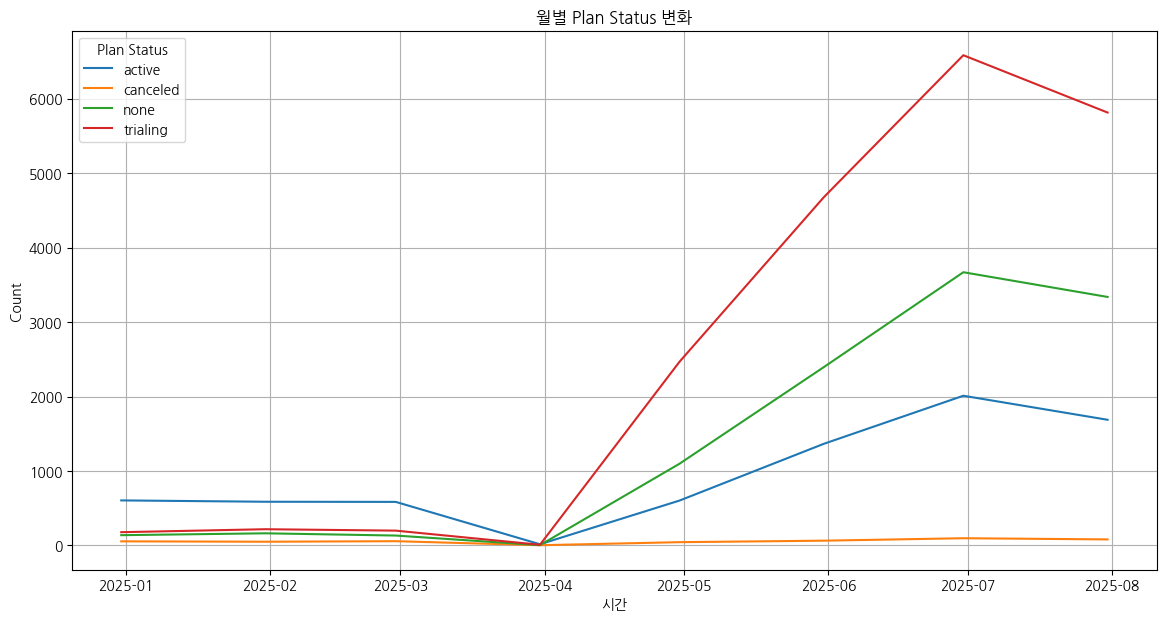

In [33]:
# plan_history_statusbytime Series를 데이터프레임으로 변환하고 인덱스 이름을 설정
plan_history_statusbytime_df = plan_history_statusbytime.to_frame(name='count').reset_index()

# 'change_time' 열을 datetime 형식으로 변환
plan_history_statusbytime_df['change_time'] = pd.to_datetime(plan_history_statusbytime_df['change_time'])

# 피벗 테이블을 사용하여 plan_status별 시간 경과에 따른 count를 재구성
pivot_df = plan_history_statusbytime_df.pivot_table(index='change_time', columns='plan_status', values='count', fill_value=0)

# 월별로 리샘플링하고 합계 계산
monthly_pivot_df = pivot_df.resample('M').sum()

# 선 그래프로 시각화
plt.figure(figsize=(14, 7))
for column in monthly_pivot_df.columns:
    plt.plot(monthly_pivot_df.index, monthly_pivot_df[column], label=column)

plt.title('월별 Plan Status 변화')
plt.xlabel('시간')
plt.ylabel('Count')
plt.legend(title='Plan Status')
plt.grid(True)
plt.show()

<Figure size 1400x700 with 0 Axes>

<Axes: xlabel='change_time'>

Text(0.5, 1.0, '월별 Plan Status 변화 (막대 그래프)')

Text(0.5, 0, '시간')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2024-12-31 00:00:00'),
  Text(1, 0, '2025-01-31 00:00:00'),
  Text(2, 0, '2025-02-28 00:00:00'),
  Text(3, 0, '2025-03-31 00:00:00'),
  Text(4, 0, '2025-04-30 00:00:00'),
  Text(5, 0, '2025-05-31 00:00:00'),
  Text(6, 0, '2025-06-30 00:00:00'),
  Text(7, 0, '2025-07-31 00:00:00')])

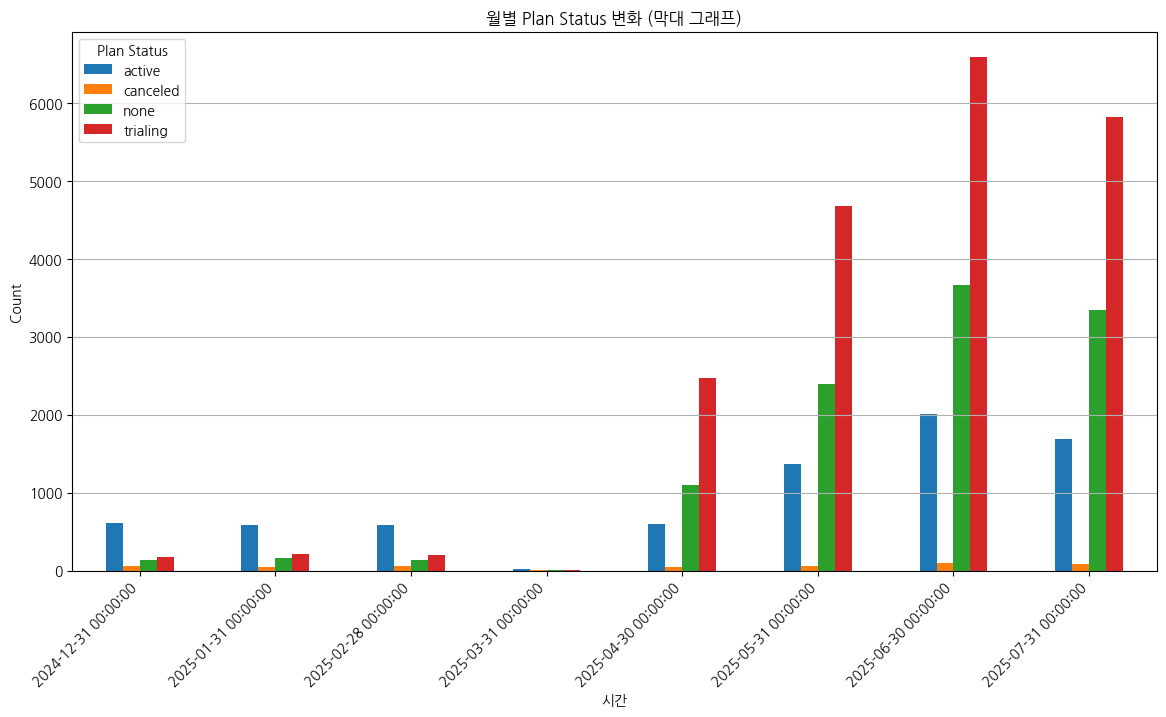

In [34]:
# 막대 그래프로 시각화 (새로운 그림)
plt.figure(figsize=(14, 7))
monthly_pivot_df.plot(kind='bar', ax=plt.gca()) # ax=plt.gca()를 사용하여 현재 활성화된 figure에 그림

plt.title('월별 Plan Status 변화 (막대 그래프)')
plt.xlabel('시간')
plt.ylabel('Count')
plt.legend(title='Plan Status')
plt.grid(axis='y') # y축에만 그리드 표시
plt.xticks(rotation=45, ha='right') # x축 라벨 회전


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='change_time'>

Text(0.5, 1.0, '월별 Plan Status 변화 (막대 그래프)')

Text(0.5, 0, '시간')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2024-12-31 00:00:00'),
  Text(1, 0, '2025-01-31 00:00:00'),
  Text(2, 0, '2025-02-28 00:00:00'),
  Text(3, 0, '2025-03-31 00:00:00'),
  Text(4, 0, '2025-04-30 00:00:00'),
  Text(5, 0, '2025-05-31 00:00:00'),
  Text(6, 0, '2025-06-30 00:00:00'),
  Text(7, 0, '2025-07-31 00:00:00')])

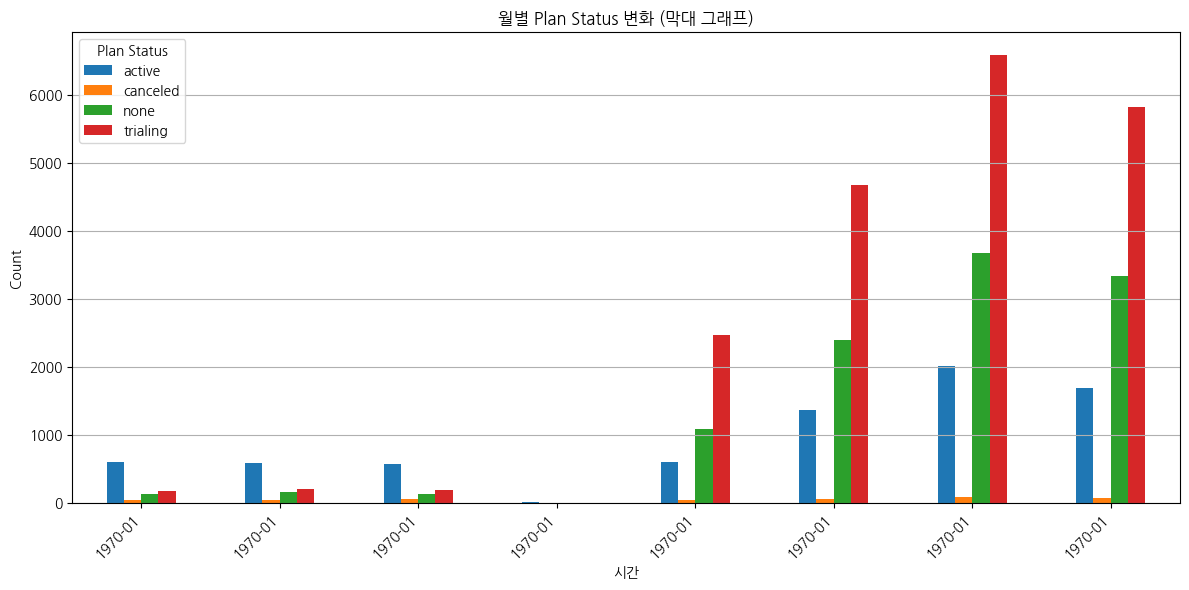

In [35]:
# 막대 그래프로 시각화 (새로운 그림)
plt.figure(figsize=(12, 6))
monthly_pivot_df.plot(kind='bar', ax=plt.gca()) # ax=plt.gca()를 사용하여 현재 활성화된 figure에 그림

plt.title('월별 Plan Status 변화 (막대 그래프)')
plt.xlabel('시간')
plt.ylabel('Count')
plt.legend(title='Plan Status')
plt.grid(axis='y') # y축에만 그리드 표시
plt.xticks(rotation=45, ha='right') # x축 라벨 회전

# x축 라벨 형식을 월, 년으로 변경
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

plt.tight_layout() # 그래프 여백 자동 조정
plt.show()

In [36]:
plan_history['reason'].value_counts()

,count
reason,
signup,19545
trial_expired,10501
trial_to_paid,5618
existing_user,3000
user_canceled,286
paid_signup,49


In [37]:
plan_history['change_time'] = pd.to_datetime(plan_history['change_time'])
plan_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38999 entries, 0 to 38998
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      38999 non-null  object        
 1   change_time  38999 non-null  datetime64[ns]
 2   plan_name    7911 non-null   object        
 3   plan_status  38999 non-null  object        
 4   reason       38999 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.5+ MB


In [38]:
plan_history['change_time_month'] = plan_history['change_time'].dt.strftime('%Y-%m')
plan_history.head()
plan_history.info()

,user_id,change_time,plan_name,plan_status,reason,change_time_month
0,usr_6b87a57bd775,2025-02-09 12:50:00,NaN,trialing,existing_user,2025-02
1,usr_b95ee57a273a,2024-12-09 20:57:00,annual_pro,active,existing_user,2024-12
2,usr_fc7ffc4130f7,2025-01-07 02:18:00,NaN,none,existing_user,2025-01
3,usr_f0dbe9c02021,2025-01-25 11:14:00,monthly_pro,active,existing_user,2025-01
4,usr_6f08473e5134,2025-01-30 02:22:00,NaN,trialing,existing_user,2025-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38999 entries, 0 to 38998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            38999 non-null  object        
 1   change_time        38999 non-null  datetime64[ns]
 2   plan_name          7911 non-null   object        
 3   plan_status        38999 non-null  object        
 4   reason             38999 non-null  object        
 5   change_time_month  38999 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 1.8+ MB


In [39]:
plan_history.groupby('change_time_month')['plan_status'].value_counts()

change_time_month  plan_status
2024-12            active          605
                   trialing        178
                   none            138
                   canceled         55
2025-01            active          587
                   trialing        218
                   none            163
                   canceled         50
2025-02            active          585
                   trialing        199
                   none            133
                   canceled         57
2025-03            active           16
                   trialing          9
                   none              4
                   canceled          3
2025-04            trialing       2468
                   none           1098
                   active          603
                   canceled         44
2025-05            trialing       4677
                   none           2395
                   active         1365
                   canceled         64
2025-06            trialing       6585
                   none           3670
                   active         2011
                   canceled         97
2025-07            trialing       5815
                   none           3338
                   active         1688
                   canceled         81
Name: count, dtype: int64

In [40]:
plan_history.groupby('change_time_month')['reason'].value_counts()

change_time_month  reason       
2024-12            existing_user     976
2025-01            existing_user    1018
2025-02            existing_user     974
2025-03            existing_user      32
2025-04            signup           2468
                   trial_expired    1098
                   trial_to_paid     595
                   user_canceled      44
                   paid_signup         8
2025-05            signup           4677
                   trial_expired    2395
                   trial_to_paid    1352
                   user_canceled      64
                   paid_signup        13
2025-06            signup           6585
                   trial_expired    3670
                   trial_to_paid    1992
                   user_canceled      97
                   paid_signup        19
2025-07            signup           5815
                   trial_expired    3338
                   trial_to_paid    1679
                   user_canceled      81
                   paid_signup         9
Name: count, dtype: int64

<Figure size 900x400 with 0 Axes>

<Axes: xlabel='change_time_month'>

Text(0.5, 1.0, '월별 Plan Change Reason 변화')

Text(0.5, 0, '시간 (월)')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2024-12'),
  Text(1, 0, '2025-01'),
  Text(2, 0, '2025-02'),
  Text(3, 0, '2025-03'),
  Text(4, 0, '2025-04'),
  Text(5, 0, '2025-05'),
  Text(6, 0, '2025-06'),
  Text(7, 0, '2025-07')])

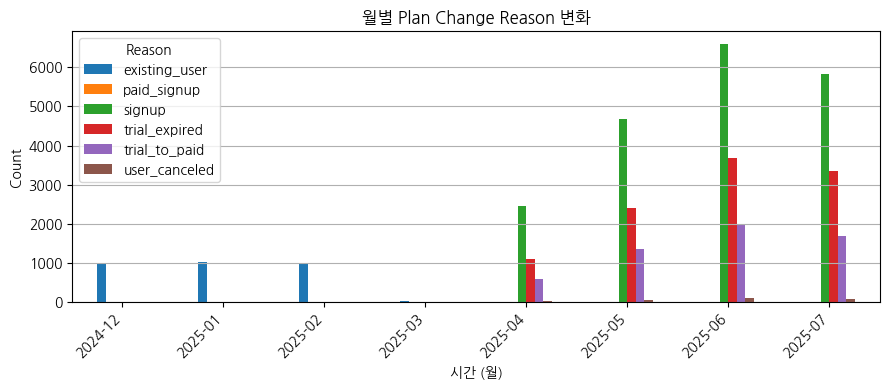

In [41]:
# 월별 'reason'별 개수를 집계
monthly_reason_counts = plan_history.groupby('change_time_month')['reason'].value_counts().unstack(fill_value=0)

# 막대 그래프로 시각화
plt.figure(figsize=(9, 4))
monthly_reason_counts.plot(kind='bar', ax=plt.gca())

plt.title('월별 Plan Change Reason 변화')
plt.xlabel('시간 (월)')
plt.ylabel('Count')
plt.legend(title='Reason')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#-

In [42]:
payment_transactions.info()
payment_transactions.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667 entries, 0 to 5666
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   payment_id  5667 non-null   object 
 1   user_id     5667 non-null   object 
 2   event_time  5667 non-null   object 
 3   plan_name   5667 non-null   object 
 4   amount      5667 non-null   float64
 5   method      5667 non-null   object 
 6   status      5667 non-null   object 
dtypes: float64(1), object(6)
memory usage: 310.0+ KB


,0
payment_id,5667
user_id,5667
event_time,112
plan_name,4
amount,4
method,6
status,1


In [43]:
ab_assignment.info()
ab_assignment.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   assignment_id    1417 non-null   object
 1   user_id          1417 non-null   object
 2   experiment_id    1417 non-null   object
 3   experiment_name  1417 non-null   object
 4   variant          1417 non-null   object
 5   assigned_at      1417 non-null   object
dtypes: object(6)
memory usage: 66.6+ KB


,0
assignment_id,1417
user_id,1417
experiment_id,3
experiment_name,3
variant,6
assigned_at,1417


In [44]:
chat_events.info()
chat_events.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2125 entries, 0 to 2124
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   chat_id  2125 non-null   object
 1   user_id  2125 non-null   object
 2   sent_at  2125 non-null   object
 3   tag      2125 non-null   object
 4   emotion  2125 non-null   object
 5   channel  2125 non-null   object
 6   status   2125 non-null   object
dtypes: object(7)
memory usage: 116.3+ KB


,0
chat_id,2125
user_id,1928
sent_at,2124
tag,8
emotion,3
channel,4
status,4


In [45]:
push_events.info()
push_events.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5336 entries, 0 to 5335
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   push_id    5336 non-null   object
 1   user_id    5336 non-null   object
 2   sent_at    5336 non-null   object
 3   opened     5336 non-null   bool  
 4   push_type  5336 non-null   object
dtypes: bool(1), object(4)
memory usage: 172.1+ KB


,0
push_id,5336
user_id,4339
sent_at,5335
opened,2
push_type,3


#-


In [46]:
event_logs_plan_history = pd.merge(event_logs, plan_history, on='user_id', how='inner')
event_logs_plan_history.head()

,user_id,session_id,event_name,event_timestamp,event_properties,device_type,location,change_time,plan_name,plan_status,reason,change_time_month
0,usr_6b87a57bd775,sess_faa527dc04c1,signup_completed,2025-02-09 12:50:00,"{""signup_method"": ""apple""}",web,"Seoul, South Korea",2025-02-09 12:50:00,NaN,trialing,existing_user,2025-02
1,usr_6b87a57bd775,sess_faa527dc04c1,signup_completed,2025-02-09 12:50:00,"{""signup_method"": ""apple""}",web,"Seoul, South Korea",2025-04-03 00:00:00,NaN,none,trial_expired,2025-04
2,usr_b95ee57a273a,sess_607f4ece57d5,signup_completed,2024-12-09 20:57:00,"{""signup_method"": ""naver""}",android,"Seoul, South Korea",2024-12-09 20:57:00,annual_pro,active,existing_user,2024-12
3,usr_fc7ffc4130f7,sess_d246f1a38cfe,signup_completed,2025-01-07 02:18:00,"{""signup_method"": ""kakao""}",ios,"Seoul, South Korea",2025-01-07 02:18:00,NaN,none,existing_user,2025-01
4,usr_fc7ffc4130f7,sess_d246f1a38cfe,signup_completed,2025-01-07 02:18:00,"{""signup_method"": ""kakao""}",ios,"Seoul, South Korea",2025-05-16 00:00:00,monthly_pro,active,paid_signup,2025-05


In [47]:
event_logs_plan_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208471 entries, 0 to 1208470
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   user_id            1208471 non-null  object        
 1   session_id         1208471 non-null  object        
 2   event_name         1208471 non-null  object        
 3   event_timestamp    1208471 non-null  object        
 4   event_properties   1208471 non-null  object        
 5   device_type        1208471 non-null  object        
 6   location           1208471 non-null  object        
 7   change_time        1208471 non-null  datetime64[ns]
 8   plan_name          494817 non-null   object        
 9   plan_status        1208471 non-null  object        
 10  reason             1208471 non-null  object        
 11  change_time_month  1208471 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 110.6+ MB


In [48]:
event_logs_plan_history
event_logs_plan_history[[event_logs_plan_history['plan_status']=='active']]

,user_id,session_id,event_name,event_timestamp,event_properties,device_type,location,change_time,plan_name,plan_status,reason,change_time_month
0,usr_6b87a57bd775,sess_faa527dc04c1,signup_completed,2025-02-09 12:50:00,"{""signup_method"": ""apple""}",web,"Seoul, South Korea",2025-02-09 12:50:00,NaN,trialing,existing_user,2025-02
1,usr_6b87a57bd775,sess_faa527dc04c1,signup_completed,2025-02-09 12:50:00,"{""signup_method"": ""apple""}",web,"Seoul, South Korea",2025-04-03 00:00:00,NaN,none,trial_expired,2025-04
2,usr_b95ee57a273a,sess_607f4ece57d5,signup_completed,2024-12-09 20:57:00,"{""signup_method"": ""naver""}",android,"Seoul, South Korea",2024-12-09 20:57:00,annual_pro,active,existing_user,2024-12
3,usr_fc7ffc4130f7,sess_d246f1a38cfe,signup_completed,2025-01-07 02:18:00,"{""signup_method"": ""kakao""}",ios,"Seoul, South Korea",2025-01-07 02:18:00,NaN,none,existing_user,2025-01
4,usr_fc7ffc4130f7,sess_d246f1a38cfe,signup_completed,2025-01-07 02:18:00,"{""signup_method"": ""kakao""}",ios,"Seoul, South Korea",2025-05-16 00:00:00,monthly_pro,active,paid_signup,2025-05
...,...,...,...,...,...,...,...,...,...,...,...,...
1208466,usr_0a9de845444d,sess_a14c94308370,page_viewed,2025-07-21 19:52:17,"{""page_name"": ""home""}",android,"Seoul, South Korea",2025-05-20 00:00:00,monthly_pro,active,trial_to_paid,2025-05
1208467,usr_0a9de845444d,sess_a14c94308370,lesson_played,2025-07-21 19:53:42,"{""course_id"": ""L109"", ""lesson_id"": 10}",android,"Seoul, South Korea",2025-05-02 23:37:27,NaN,trialing,signup,2025-05
1208468,usr_0a9de845444d,sess_a14c94308370,lesson_played,2025-07-21 19:53:42,"{""course_id"": ""L109"", ""lesson_id"": 10}",android,"Seoul, South Korea",2025-05-20 00:00:00,monthly_pro,active,trial_to_paid,2025-05
1208469,usr_0a9de845444d,sess_a14c94308370,first_lesson_played,2025-07-21 19:54:00,"{""course_id"": ""L109""}",android,"Seoul, South Korea",2025-05-02 23:37:27,NaN,trialing,signup,2025-05


KeyError: "None of [Index([(False, False, True, False, True, True, False, False, True, False, True, False, False, False, True, True, False, False, True, True, False, False, True, True, True, True, True, False, True, True, False, True, False, False, True, False, False, False, True, False, True, True, True, True, True, False, True, True, False, True, True, True, False, False, True, False, True, True, True, False, True, True, False, True, False, True, True, False, False, True, True, False, True, False, False, True, False, True, True, True, False, False, True, True, True, True, False, True, True, False, True, True, True, True, False, False, False, True, True, True, ...)], dtype='object')] are in the [columns]"

In [ ]:
users.last_seen_at.value_counts()

In [ ]:
users_plan_history = pd.merge(users, plan_history, on='user_id')

In [ ]:
users['plan_status'].value_counts()

In [ ]:
chat_events[]